In [116]:
import numpy as np
import matplotlib.pyplot as plt
from orb import orb
from orb import get_max_orb_distance



In [117]:
A_initial_pos = 100*np.random.rand(2)#np.array([])
B_initial_pos = 100*np.random.rand(2)#np.array([])
C_initial_pos = 100*np.random.rand(2)#np.array([])
D_initial_pos = 100*np.random.rand(2)#np.array([])

A = orb(A_initial_pos)

B = orb(B_initial_pos)

C = orb(C_initial_pos)

D = orb(D_initial_pos)

orbs = np.array([A, B, C, D])

A.set_target(B)
B.set_target(C)
C.set_target(D)
D.set_target(A)

In [118]:
t = 0
dt = 0.1
time_array = np.array([0])
max_dists = np.array([get_max_orb_distance(orbs)])

In [119]:
while max_dists[-1] >= 0.3:

    A.update_velocity()
    B.update_velocity()
    C.update_velocity()
    D.update_velocity()

    A.update_position(dt)
    B.update_position(dt)
    C.update_position(dt)
    D.update_position(dt)

    t += dt
    time_array = np.append(time_array, t)

    max_dists = np.append(max_dists, get_max_orb_distance(orbs))



[36.85372305]


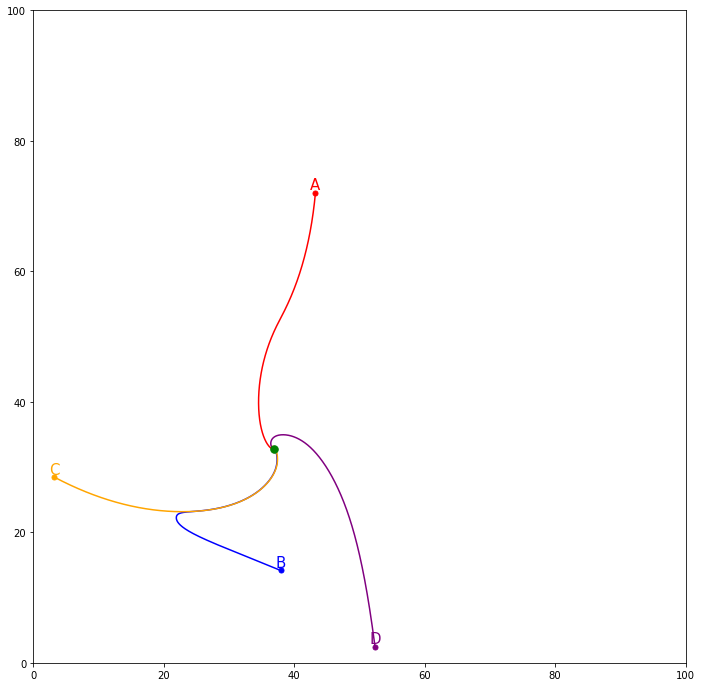

In [120]:
fig = plt.figure(figsize=(12,12))

plt.plot(A.x_positions, A.y_positions, color='red')
plt.plot(A.x_positions[0], A.y_positions[0], color='red', marker=".", markersize=10)
plt.text(A.x_positions[0], A.y_positions[0], 'A', fontsize = 15, color='red',ha='center', va = 'bottom')
plt.plot(B.x_positions, B.y_positions, color='blue')
plt.plot(B.x_positions[0], B.y_positions[0], color='blue', marker=".", markersize=10)
plt.text(B.x_positions[0], B.y_positions[0], 'B', fontsize = 15, color='blue',ha='center', va = 'bottom')
plt.plot(C.x_positions, C.y_positions, color='orange')
plt.plot(C.x_positions[0], C.y_positions[0], color='orange', marker=".", markersize=10)
plt.text(C.x_positions[0], C.y_positions[0], 'C', fontsize = 15, color='orange',ha='center', va = 'bottom')
plt.plot(D.x_positions, D.y_positions, color='purple')
plt.plot(D.x_positions[0], D.y_positions[0], color='purple', marker=".", markersize=10)
plt.text(D.x_positions[0], D.y_positions[0], 'D', fontsize = 15, color='purple',ha='center', va = 'bottom')
plt.gca().set_aspect("equal")
plt.xlim([0, 100])
plt.ylim([0, 100])



plt.plot(A.position[0], A.position[1], color='green', marker=".", markersize=15)
plt.show

a = np.array([])

a = np.append(a, A.position[0])

print(a)\

plt.savefig('path.png')

IndexError: index 560 is out of bounds for axis 0 with size 509

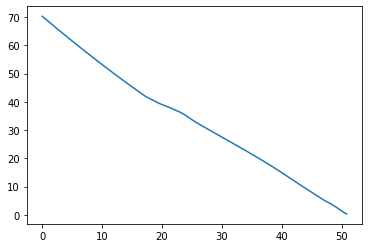

In [121]:
plt.plot(time_array, max_dists)